<IPython.core.display.Javascript object>


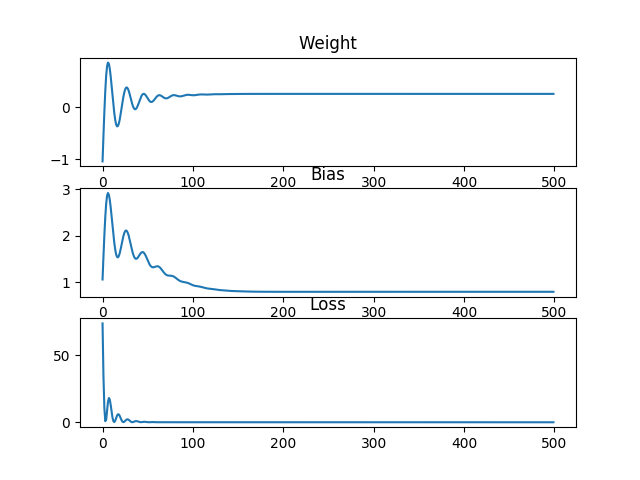

step 9 cost 13.049186706542969
step 19 cost 4.842756748199463
step 29 cost 1.874351143836975
step 39 cost 0.6901936531066895
step 49 cost 0.23663043975830078
step 59 cost 0.1031206026673317
step 69 cost 0.09268870949745178
step 79 cost 0.09370120614767075
step 89 cost 0.08329218626022339
step 99 cost 0.07847791910171509
step 109 cost 0.0781351625919342
step 119 cost 0.07728148251771927
step 129 cost 0.07707339525222778
step 139 cost 0.07697958499193192
step 149 cost 0.07694323360919952
step 159 cost 0.07693269848823547
step 169 cost 0.07693004608154297
step 179 cost 0.07692889869213104
step 189 cost 0.07692898064851761
step 199 cost 0.07692886888980865
step 209 cost 0.07692886143922806
step 219 cost 0.07692883908748627
step 229 cost 0.07692886143922806
step 239 cost 0.07692884653806686
step 249 cost 0.07692883163690567
step 259 cost 0.07692883163690567
step 269 cost 0.07692884653806686
step 279 cost 0.07692883908748627
step 289 cost 0.07692883908748627
step 299 cost 0.07692883908748627

In [1]:
# coding: utf-8

# In[81]:


import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
get_ipython().magic('matplotlib notebook')


# In[82]:


import matplotlib.patches as mpatches


# In[120]:


train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27,3.1])
#np.random.rand(100, ).astype(np.float32)


# In[121]:


#y_data = train_X*3 + 2
#train_Y  = np.vectorize(lambda y: y + np.random.normal(loc=0.0, scale=0.2))(y_data)

train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]


# In[98]:


X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)


# In[99]:


W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')


# In[100]:


pred = tf.add(tf.multiply(X, W), b)
#pred = w*x + b


# In[101]:


#cost = tf.reduce_mean(tf.square(pred-Y))
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)


# In[122]:


learning_rate = 0.5


# In[123]:


optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)


# In[124]:


init = tf.global_variables_initializer()


# In[125]:


n_epochs = 500
display_step=10
params = np.zeros((3,n_epochs))
feed={X: train_X, Y: train_Y}


# In[126]:


with tf.Session() as sess:
    sess.run(init)
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.ion()
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    fig.show()
    fig.canvas.draw()
    
    for epoch in range(n_epochs):
        _, loss_val, W_, b_ = sess.run([optimizer, cost, W, b], feed_dict=feed)
        if(epoch+1) % display_step == 0:
            print("step {} cost {}".format(epoch, loss_val))
        params[:,epoch] = np.array([W_, b_, loss_val])
        ax.clear()
        plt.plot(train_X, train_Y, 'ro', label='Original data')
        ax.plot(train_X, W_ * train_X + b_)
        fig.canvas.draw()        
    print ("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print ("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()



# In[127]:


param_titles = ['Weight', 'Bias', 'Loss']

for i in range(params.shape[0]):
    plt.subplot(3, 1, i+1)
    plt.plot(params[i])
    plt.title(param_titles[i])
    plt.show()
